In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/flightdata.csv')

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

<Axes: xlabel='ARR_TIME', ylabel='Density'>

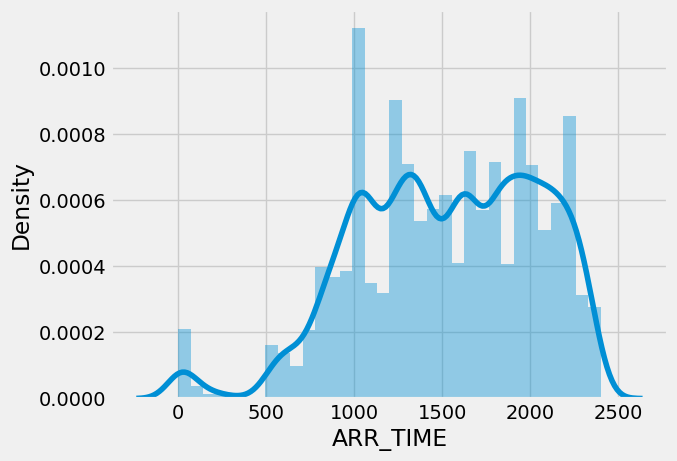

In [ ]:
sns.distplot(df['ARR_TIME'])

<Axes: xlabel='CRS_ARR_TIME', ylabel='Density'>

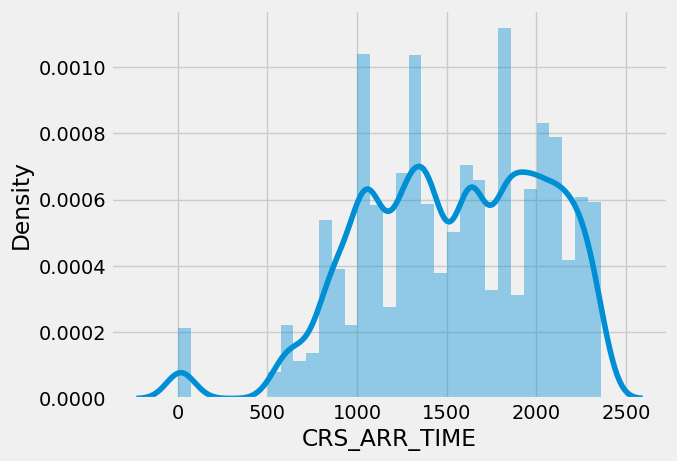

In [ ]:
sns.distplot(df['CRS_ARR_TIME'])

In [ ]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST
0,DL,N836DN,ATL,SEA
1,DL,N964DN,DTW,MSP
2,DL,N813DN,ATL,SEA
3,DL,N587NW,SEA,MSP
4,DL,N836DN,SEA,DTW


In [ ]:
for i,j in enumerate(df_cat):
  print(j)
  print(i)

UNIQUE_CARRIER
0
TAIL_NUM
1
ORIGIN
2
DEST
3


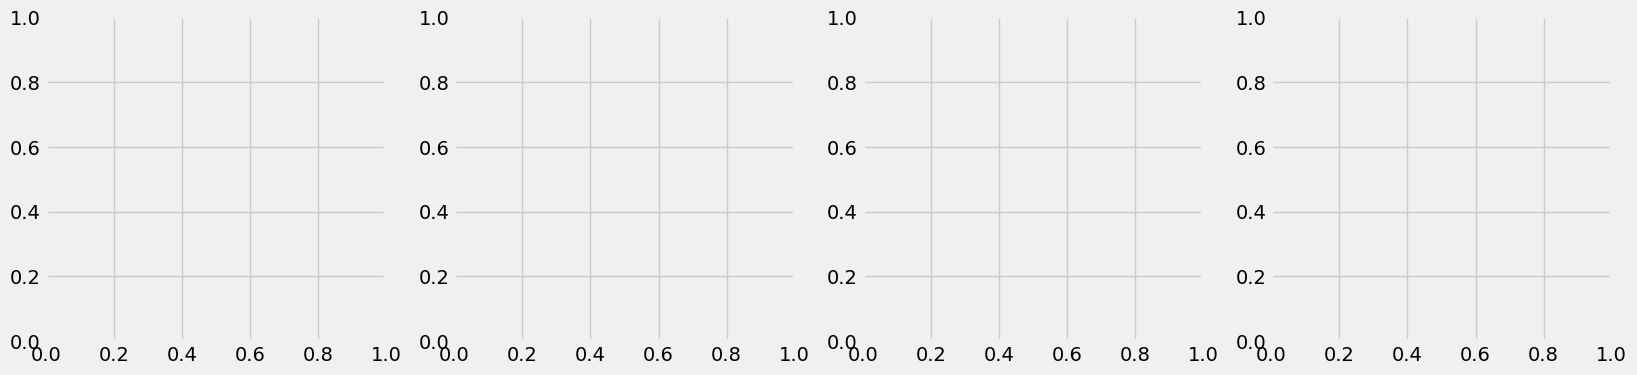

In [ ]:
plt.figure(figsize=(18,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,4,i+1)
  

<Axes: ylabel='count'>

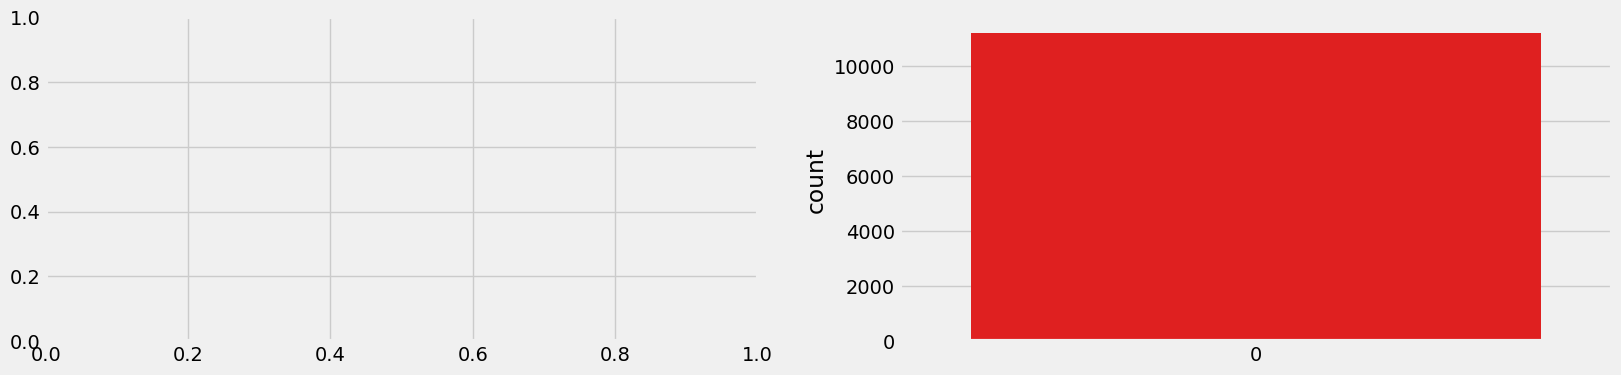

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.subplot(122)
sns.countplot(df['DAY_OF_MONTH'],color='r')

<Axes: xlabel='UNIQUE_CARRIER', ylabel='count'>

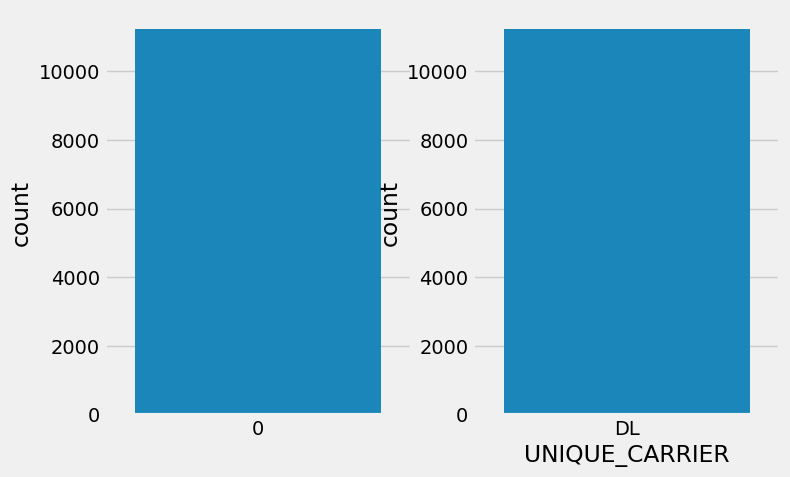

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(df['ACTUAL_ELAPSED_TIME'])
plt.subplot(132)
sns.countplot(x='UNIQUE_CARRIER',data=df)

In [ ]:
df['DAY_OF_MONTH'] = ['15 to 30' if x<=30 else "30-50" if x>30 and x<50 else '50+' for x in df['DAY_OF_MONTH']]

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,15 to 30,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,15 to 30,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,15 to 30,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,15 to 30,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,15 to 30,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
pd.crosstab(df['DEP_DELAY'],df['Unnamed: 25'])

Unnamed: 25
DEP_DELAY


<Axes: >

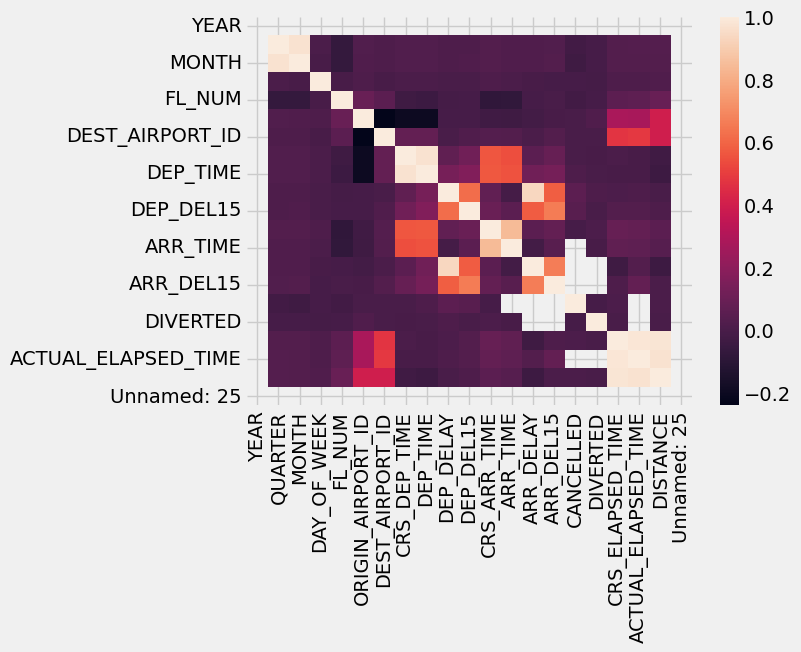

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.describe(include='all')

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231,11231.000000,11231,11231,11231.000000,11231.000000,11231,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
unique,NaN,NaN,NaN,2,NaN,1,789,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,15 to 30,NaN,DL,N857DZ,NaN,NaN,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,11022,NaN,11231,76,NaN,NaN,3100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.0,2.544475,6.628973,NaN,3.960199,NaN,NaN,1334.325617,12334.516695,NaN,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,NaN,1.995257,NaN,NaN,811.875227,1595.026510,NaN,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,7.000000,10397.000000,NaN,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,NaN,2.000000,NaN,NaN,624.000000,10397.000000,NaN,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,NaN,4.000000,NaN,NaN,1267.000000,12478.000000,NaN,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,NaN,6.000000,NaN,NaN,2032.000000,13487.000000,NaN,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN


In [ ]:
df.shape

(11231, 26)

In [ ]:
df.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

In [ ]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
df.dropna()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25


In [ ]:
df.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

<Axes: >

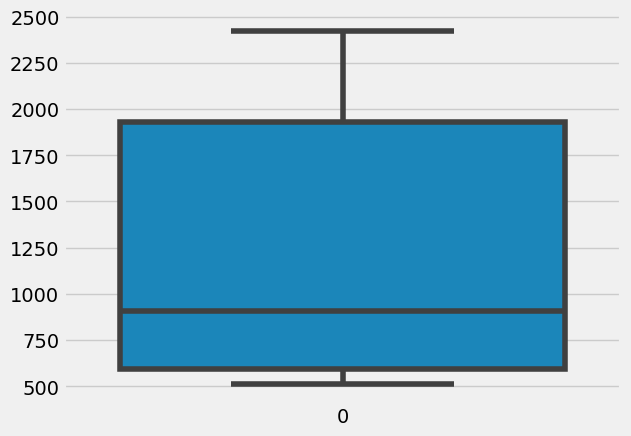

In [ ]:
sns.boxplot(df['DISTANCE'])

In [ ]:
q1 = np.quantile(df['DISTANCE'],0.25)
q3 = np.quantile(df['DISTANCE'],0.75)

print('Q1 ={}'.format(q1))
print('Q3 ={}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

Q1 =594.0
Q3 =1927.0
IQR value is 1333.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  object 
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

<Axes: >

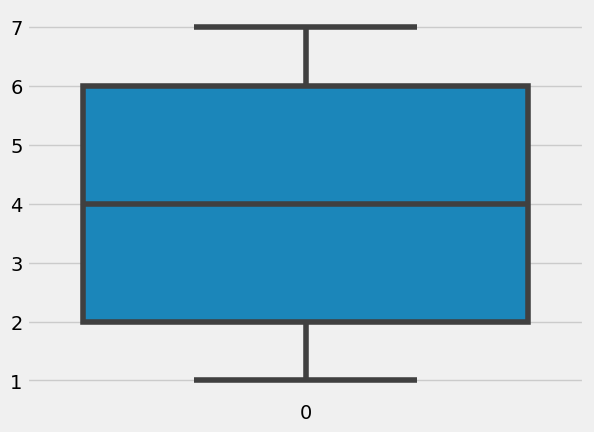

In [ ]:
sns.boxplot(df['DAY_OF_WEEK'])

In [ ]:
q1 = np.quantile(df['DISTANCE'],0.25)
q3 = np.quantile(df['DISTANCE'],0.75)

print('Q1 ={}'.format(q1))
print('Q3 ={}'.format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.6*IQR)
lowerBound = q1-(1.6*IQR)

print('the upper bound value is {} & The lower bound value is {}'.format(upperBound,lowerBound))

print('skwed data:',len(df['DISTANCE']>upperBound))


Q1 =594.0
Q3 =1927.0
IQR value is 1333.0
the upper bound value is 4059.8 & The lower bound value is -1538.8000000000002
skwed data: 11231


<Axes: xlabel='DAY_OF_WEEK', ylabel='Density'>

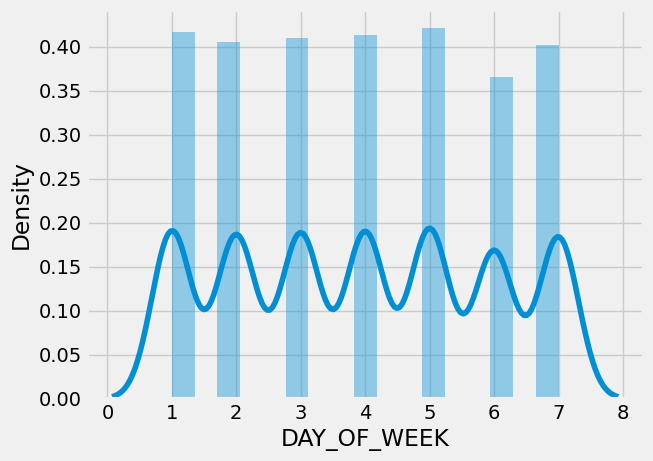

In [ ]:
sns.distplot(df['DAY_OF_WEEK'])

<Axes: xlabel='DAY_OF_WEEK', ylabel='Density'>

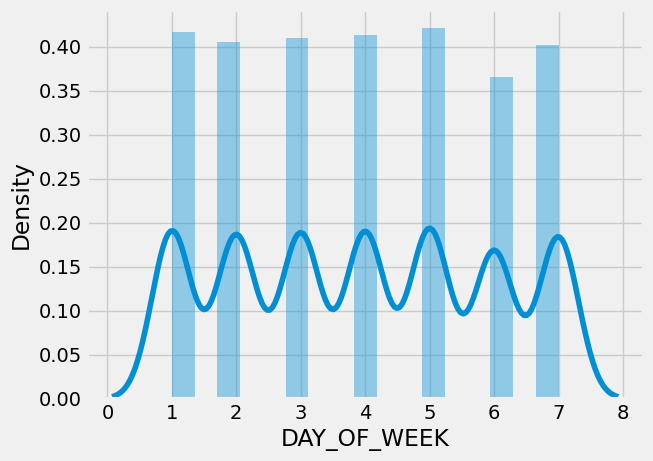

In [ ]:
sns.distplot(df['DAY_OF_WEEK'])

<Axes: xlabel='DAY_OF_WEEK', ylabel='Density'>

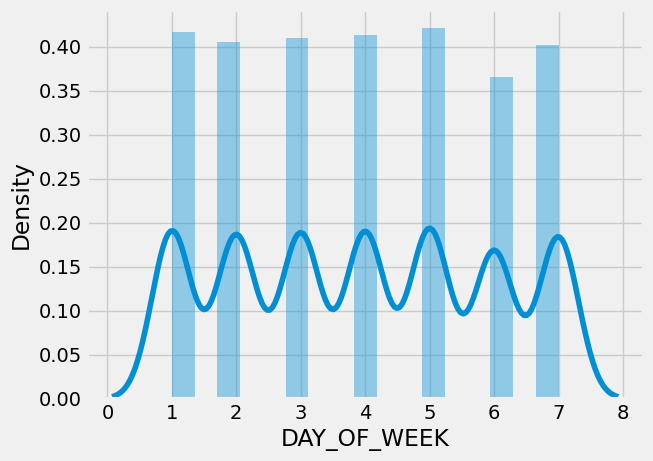

In [ ]:
sns.distplot(df['DAY_OF_WEEK'])

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,15 to 30,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,15 to 30,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,15 to 30,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,15 to 30,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,15 to 30,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df['DISTANCE'] = [0 if x=='low' else 1 if x=='normal' else 2 for x in df['DISTANCE']]

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,15 to 30,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2,NaN
1,2016,1,1,15 to 30,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,2,NaN
2,2016,1,1,15 to 30,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2,NaN
3,2016,1,1,15 to 30,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,2,NaN
4,2016,1,1,15 to 30,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,2,NaN


In [ ]:

x = df.drop('DAY_OF_WEEK',axis=1)
x.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,15 to 30,DL,N836DN,1399,10397,ATL,14747,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2,NaN
1,2016,1,1,15 to 30,DL,N964DN,1476,11433,DTW,13487,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,2,NaN
2,2016,1,1,15 to 30,DL,N813DN,1597,10397,ATL,14747,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2,NaN
3,2016,1,1,15 to 30,DL,N587NW,1768,14747,SEA,13487,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,2,NaN
4,2016,1,1,15 to 30,DL,N836DN,1823,14747,SEA,11433,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,2,NaN


In [ ]:
y =df['DAY_OF_WEEK']
y

0        5
1        5
2        5
3        5
4        5
        ..
11226    5
11227    5
11228    5
11229    5
11230    5
Name: DAY_OF_WEEK, Length: 11231, dtype: int64

In [ ]:
# import necessary reg 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/flightdata.csv')

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [ ]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

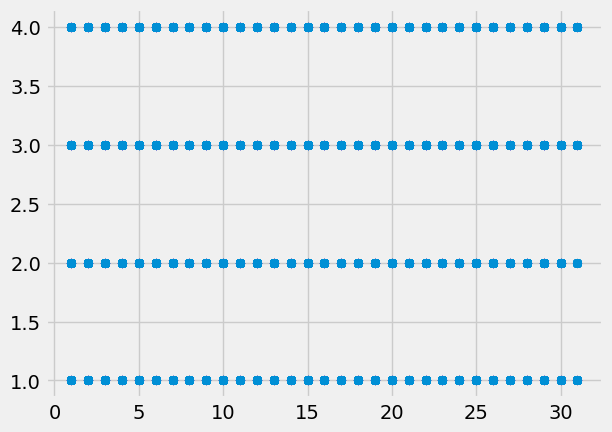

In [ ]:
plt.scatter(df['DAY_OF_MONTH'],df['QUARTER'])

In [ ]:
x = df.iloc[:,0:1]
x.head()

,YEAR
0,2016
1,2016
2,2016
3,2016
4,2016


In [ ]:
y = df.iloc[:,1:]
y.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
y = df.iloc[:,1:]
y.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression

In [ ]:
df['ORIGIN'].unique()

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
x = df.iloc[:,0:4]
x.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH
0,2016,1,1,1
1,2016,1,1,1
2,2016,1,1,1
3,2016,1,1,1
4,2016,1,1,1


In [ ]:
y = df.iloc[:,4:]
y.head()

,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(8984, 4)
(2247, 4)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(ytest,ypred)

NameError: ignored

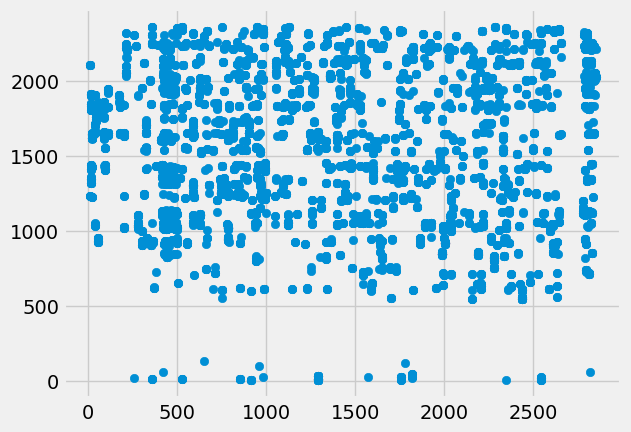

In [ ]:
plt.scatter(df['FL_NUM'],df['CRS_ARR_TIME'])

In [ ]:
py = PolynomialFeatures()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
py = PolynomialFeatures()

In [ ]:
x = py.fit_transform(x)
x

array([[1.000e+00, 2.016e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.016e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.016e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 2.016e+03, 4.000e+00, ..., 1.440e+02, 3.600e+02,
        9.000e+02],
       [1.000e+00, 2.016e+03, 4.000e+00, ..., 1.440e+02, 3.600e+02,
        9.000e+02],
       [1.000e+00, 2.016e+03, 4.000e+00, ..., 1.440e+02, 3.600e+02,
        9.000e+02]])

In [ ]:
lr = LinearRegression()

In [ ]:
py = PolynomialFeatures(degree=5)

In [ ]:
xp = py.fit_transform(x)
xp

array([[1.00000e+00, 1.00000e+00, 2.01600e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 2.01600e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 2.01600e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [1.00000e+00, 1.00000e+00, 2.01600e+03, ..., 9.44784e+13,
        2.36196e+14, 5.90490e+14],
       [1.00000e+00, 1.00000e+00, 2.01600e+03, ..., 9.44784e+13,
        2.36196e+14, 5.90490e+14],
       [1.00000e+00, 1.00000e+00, 2.01600e+03, ..., 9.44784e+13,
        2.36196e+14, 5.90490e+14]])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('/content/flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.describe(include='all')

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231,11231,11231.000000,11231.000000,11231,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
unique,NaN,NaN,NaN,NaN,NaN,1,789,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,DL,N857DZ,NaN,NaN,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11231,76,NaN,NaN,3100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.0,2.544475,6.628973,15.790758,3.960199,NaN,NaN,1334.325617,12334.516695,NaN,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,NaN,NaN,811.875227,1595.026510,NaN,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,NaN,NaN,7.000000,10397.000000,NaN,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,NaN,NaN,624.000000,10397.000000,NaN,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,NaN,NaN,1267.000000,12478.000000,NaN,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,NaN,NaN,2032.000000,13487.000000,NaN,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN


In [ ]:
x = df.iloc[:,0:4]
x.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH
0,2016,1,1,1
1,2016,1,1,1
2,2016,1,1,1
3,2016,1,1,1
4,2016,1,1,1


In [ ]:
y = df.iloc[:,4:]
y.head()

,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.shape

(11231, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
df.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,1.000000,0.969890,0.003686,0.002389,-0.068411,0.021397,0.013962,0.023468,0.024760,...,0.028561,0.019311,0.017094,0.023102,-0.025305,-0.012403,0.028688,0.031273,0.030841,NaN
MONTH,NaN,0.969890,1.000000,0.003095,-0.005027,-0.066573,0.019809,0.012399,0.021989,0.022717,...,0.028657,0.019168,0.018201,0.030161,-0.035670,-0.009693,0.026254,0.030195,0.028921,NaN
DAY_OF_MONTH,NaN,0.003686,0.003095,1.000000,0.010415,-0.001812,0.000266,0.011000,0.009126,0.007515,...,0.000857,-0.001956,-0.022221,-0.000597,-0.013670,-0.014101,0.002928,0.000175,0.000320,NaN
DAY_OF_WEEK,NaN,0.002389,-0.005027,0.010415,1.000000,-0.004133,0.014915,-0.005374,0.005299,0.003021,...,0.012490,0.003068,-0.005965,-0.012063,-0.011337,-0.013820,0.012862,0.012206,0.017456,NaN
FL_NUM,NaN,-0.068411,-0.066573,-0.001812,-0.004133,1.000000,0.091777,0.051733,-0.036180,-0.043164,...,-0.081598,-0.078940,-0.011054,-0.002378,-0.027481,-0.008762,0.058434,0.060561,0.089529,NaN
ORIGIN_AIRPORT_ID,NaN,0.021397,0.019809,0.000266,0.014915,0.091777,1.000000,-0.240899,-0.197410,-0.200172,...,-0.030674,-0.036143,-0.018914,-0.006250,-0.001980,0.016843,0.281852,0.276192,0.395151,NaN
DEST_AIRPORT_ID,NaN,0.013962,0.012399,0.011000,-0.005374,0.051733,-0.240899,1.000000,0.074794,0.075888,...,0.032113,0.027279,0.005625,0.029525,-0.000988,-0.000462,0.476135,0.482952,0.395802,NaN
CRS_DEP_TIME,NaN,0.023468,0.021989,0.009126,0.005299,-0.036180,-0.197410,0.074794,1.000000,0.969636,...,0.559401,0.540363,0.050107,0.086057,0.000590,-0.005903,0.001885,-0.004629,-0.032432,NaN
DEP_TIME,NaN,0.024760,0.022717,0.007515,0.003021,-0.043164,-0.200172,0.075888,0.969636,1.000000,...,0.566615,0.554034,0.115019,0.127593,0.013490,-0.002973,-0.003421,-0.006715,-0.039738,NaN


In [ ]:
x = df.iloc[:,1:2]
x.head()

,QUARTER
0,1
1,1
2,1
3,1
4,1


In [ ]:
y = df.iloc[1,2:]
y.head()

MONTH                  1
DAY_OF_MONTH           1
DAY_OF_WEEK            5
UNIQUE_CARRIER        DL
TAIL_NUM          N964DN
Name: 1, dtype: object

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('/content/flightdata.csv')

In [ ]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

<Axes: >

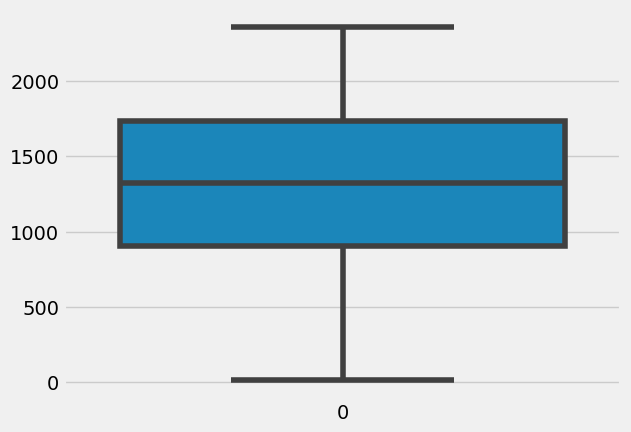

In [ ]:
sns.boxplot(df['CRS_DEP_TIME'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

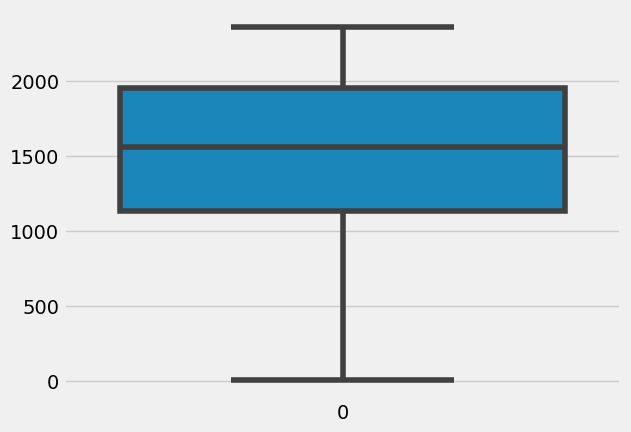

In [ ]:
sns.boxplot(df['CRS_ARR_TIME'])